<h1>Estudo de caso: Enem 2017</h1>

<b>Problema: </b> Você é cientista de dados do Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome e precisa fazer uma análise técnica da inclusão social na educação. Para isso sua ideia foi analisar variáveis e indicadores dos conjuntos de dados abertos da educação. A primeira análise será feita no conjunto de dados do Enem 2017.

Baixar arquivo em: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

<b>Estratégia:</b> Dentre os arquivos baixados, você encontrará o dicionário de dados. Este arquivo explica quais as variáveis e valores que estas podem assumir. Sua estratégia é começar com uma análise univariada das variáveis interessantes para o tema da pesquisa. Em seguida, serão escolhidos indicadores para avaliar cada um das variáveis de interesse. A imagem abaixo resume a estratégia de uma forma visual:

<img src="../assets/tema_eda.png">

O conjunto de dados do Enem 2017 é muito grande e devemos nos atentar ao tentar fazer a leitura de tal conjunto pelos métodos tradicionais. É preciso usar estratégias de gerenciamento de memória para execução do trabalho.

In [1]:
# Bibliotecas para o estudo
import pandas as pd # estrutura de dados
import matplotlib.pyplot as plt # análise por gráficos
import seaborn as sns # análise por gráficos

<h1>Análise univariada das variáveis de interesse</h1>

## Variável COR/RACA

In [2]:
path = '../datasets/microdados_enem_2017/DADOS/MICRODADOS_ENEM_2017.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['TP_COR_RACA'] # IMPORTANTE: ler só a coluna TP_COR_RACA
)
df.info() # uso de memória 51.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731278 entries, 0 to 6731277
Data columns (total 1 columns):
 #   Column       Dtype
---  ------       -----
 0   TP_COR_RACA  int64
dtypes: int64(1)
memory usage: 51.4 MB


In [3]:
df_temp = df['TP_COR_RACA'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    0: "Não declarado",
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena",
})
df_temp

Parda            0.468632
Branca           0.349893
Preta            0.132948
Amarela          0.023078
Não declarado    0.018942
Indígena         0.006506
Name: TP_COR_RACA, dtype: float64

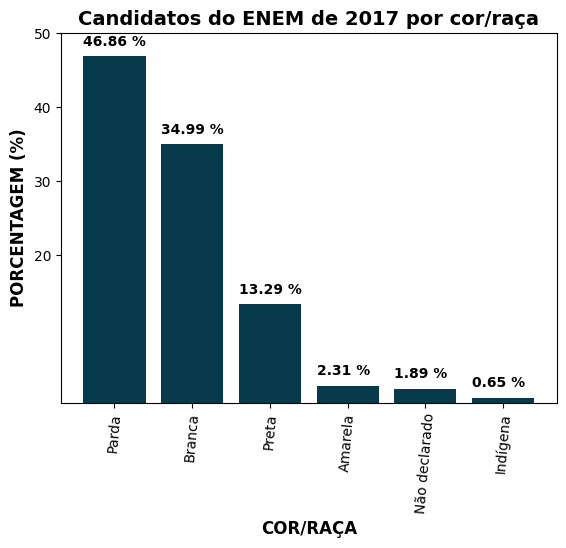

In [4]:
# Fazer gráfico completo de barras de inscritos por cor/raça

x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar(x, heights,
    color=len(df_temp)*["#073B4C"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    "Candidatos do ENEM de 2017 por cor/raça", # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "COR/RAÇA",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i+1) * 0.1 for i in range(1, int(10*max(df_temp.values)+1))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, cor_raca in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[cor_raca] + 0.02,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[cor_raca]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold'                          # fonte em negrito
    )

# Mostrando o gráfico
plt.show()

<h1>Variável SEXO</h1>

In [5]:
path = '../datasets/microdados_enem_2017/DADOS/MICRODADOS_ENEM_2017.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['TP_SEXO'] # IMPORTANTE: ler só a coluna TP_SEXO
)
df.info() # uso de memória 51.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731278 entries, 0 to 6731277
Data columns (total 1 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   TP_SEXO  object
dtypes: object(1)
memory usage: 51.4+ MB


In [6]:
df_temp = df['TP_SEXO'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    "F": "Feminino",
    "M": "Masculino",
})
df_temp

Feminino     0.586325
Masculino    0.413675
Name: TP_SEXO, dtype: float64

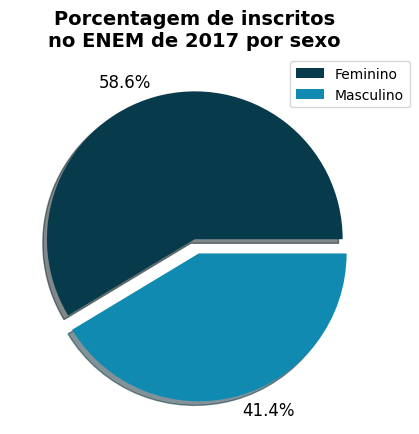

In [7]:
# Fazer gráfico completo de pizza de inscritos por sexo

## Valores (x) para o gráfico
x = df_temp.values

## Criando o gráfico com mais propriedades
plt.pie(x,                                            # Valores
    labels=["{:.1f}%".format(100*x[0]),               # Rótulo do 1º setor
            "{:.1f}%".format(100*x[1])],              # Rótulo do 2º setor
    colors=["#073B4C", "#118AB2"],                    # Cores respectivas dos setores
    shadow=True,                                      # Sombra no gráfico
    explode=[0,0.1],                                  # Destacando o 2º setor
    textprops={                                       # Propriedades do texto dos rótulos
        "fontsize":12                                 # Fonte de tamanho 12
    }
)

## Propriedades gerais

## Título
plt.title(
    "Porcentagem de inscritos\nno ENEM de 2017 por sexo", # Texto
    fontsize=14,                                          # Fonte de tamanho 14
    fontweight='bold'                                     # Fonte em negrito
)
## Legenda
plt.legend(
    df_temp.index,                                     # Texto
    bbox_to_anchor=(0.6, 0, 0.5, 1),                   # Posição da legenda
    prop={                                             # Outras propriedades 
        "size": 'medium',                              # Fonte de tamanho médio
    }
)

## Mostrando o gráfico
plt.show()

<h1>Variável Q006 (Renda familiar)</h1>

In [8]:
path = '../datasets/microdados_enem_2017/DADOS/MICRODADOS_ENEM_2017.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['Q006']        # IMPORTANTE: ler só a coluna Q006
)
df.info() # uso de memória 51.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731278 entries, 0 to 6731277
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Q006    object
dtypes: object(1)
memory usage: 51.4+ MB


In [9]:
df_temp = df["Q006"].value_counts(normalize=True)
renda_map = {
    "A": "Nenhuma renda.",
    "B": "Até R$ 937,00.",
    "C": "De R$ 937,01 até R$ 1.405,50.",
    "D": "De R$ 1.405,51 até R$ 1.874,00.",
    "E": "De R$ 1.874,01 até R$ 2.342,50.",
    "F": "De R$ 2.342,51 até R$ 2.811,00.",
    "G": "De R$ 2.811,01 até R$ 3.748,00.",
    "H": "De R$ 3.748,01 até R$ 4.685,00.",
    "I": "De R$ 4.685,01 até R$ 5.622,00.",
    "J": "De R$ 5.622,01 até R$ 6.559,00.",
    "K": "De R$ 6.559,01 até R$ 7.496,00.",
    "L": "De R$ 7.496,01 até R$ 8.433,00.",
    "M": "De R$ 8.433,01 até R$ 9.370,00.",
    "N": "De R$ 9.370,01 até R$ 11.244,00.",
    "O": "De R$ 11.244,01 até R$ 14.055,00.",
    "P": "De R$ 14.055,01 até R$ 18.740,00.",
    "Q": "Mais de R$ 18.740,00."
}
df_temp.index = df_temp.index.map(renda_map)
df_temp = df_temp.reindex(renda_map.values())
df_temp

Nenhuma renda.                       0.043010
Até R$ 937,00.                       0.283753
De R$ 937,01 até R$ 1.405,50.        0.245452
De R$ 1.405,51 até R$ 1.874,00.      0.111787
De R$ 1.874,01 até R$ 2.342,50.      0.080314
De R$ 2.342,51 até R$ 2.811,00.      0.049825
De R$ 2.811,01 até R$ 3.748,00.      0.054331
De R$ 3.748,01 até R$ 4.685,00.      0.036131
De R$ 4.685,01 até R$ 5.622,00.      0.025384
De R$ 5.622,01 até R$ 6.559,00.      0.015465
De R$ 6.559,01 até R$ 7.496,00.      0.009558
De R$ 7.496,01 até R$ 8.433,00.      0.007657
De R$ 8.433,01 até R$ 9.370,00.      0.006526
De R$ 9.370,01 até R$ 11.244,00.     0.009427
De R$ 11.244,01 até R$ 14.055,00.    0.006714
De R$ 14.055,01 até R$ 18.740,00.    0.005782
Mais de R$ 18.740,00.                0.008886
Name: Q006, dtype: float64

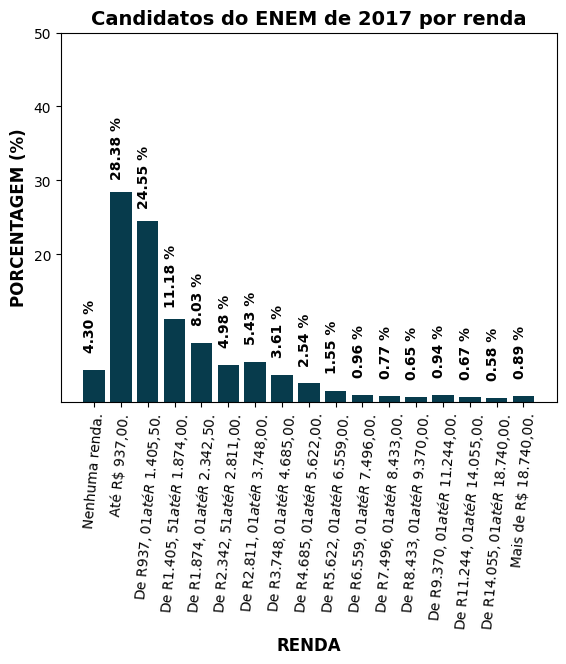

In [10]:
# Fazer gráfico completo de barras de inscritos por renda

x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar(x, heights,
    color=len(df_temp)*["#073B4C"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    "Candidatos do ENEM de 2017 por renda",    # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "RENDA",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i+1) * 0.1 for i in range(1, int(10*max(df_temp.values)+3))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, cor_raca in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[cor_raca] + 0.06,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[cor_raca]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold',                         # fonte em negrito
        rotation=90
    )

# Mostrando o gráfico
plt.show()

<h1>Variável TP_IDADE</h1>

In [11]:
path = '../datasets/microdados_enem_2017/DADOS/MICRODADOS_ENEM_2017.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['TP_FAIXA_ETARIA']        # IMPORTANTE: ler só a coluna Q006
)
df.info() # uso de memória 51.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731278 entries, 0 to 6731277
Data columns (total 1 columns):
 #   Column           Dtype
---  ------           -----
 0   TP_FAIXA_ETARIA  int64
dtypes: int64(1)
memory usage: 51.4 MB


In [12]:
df_temp = df["TP_FAIXA_ETARIA"].value_counts(normalize=True)
idade_map = {
    1: "Menor de 17 anos",
    2: "17 anos",
    3: "18 anos",
    4: "19 anos",
    5: "20 anos",
    6: "21 anos",
    7: "22 anos",
    8: "23 anos",
    9: "24 anos",
    10: "25 anos",
    11: "Entre 26 e 30 anos",
    12: "Entre 31 e 35 anos",
    13: "Entre 36 e 40 anos",
    14: "Entre 41 e 45 anos",
    15: "Entre 46 e 50 anos",
    16: "Entre 51 e 55 anos",
    17: "Entre 56 e 60 anos",
    18: "Entre 61 e 65 anos",
    19: "Entre 66 e 70 anos",
    20: "Maior de 70 anos"
}
df_temp.index = df_temp.index.map(idade_map)
df_temp = df_temp.reindex(idade_map.values())
df_temp

Menor de 17 anos      0.060040
17 anos               0.143501
18 anos               0.145687
19 anos               0.103153
20 anos               0.081778
21 anos               0.063490
22 anos               0.051985
23 anos               0.042590
24 anos               0.035732
25 anos               0.029460
Entre 26 e 30 anos    0.100410
Entre 31 e 35 anos    0.059400
Entre 36 e 40 anos    0.037286
Entre 41 e 45 anos    0.021571
Entre 46 e 50 anos    0.012727
Entre 51 e 55 anos    0.006848
Entre 56 e 60 anos    0.002912
Entre 61 e 65 anos    0.001009
Entre 66 e 70 anos    0.000310
Maior de 70 anos      0.000111
Name: TP_FAIXA_ETARIA, dtype: float64

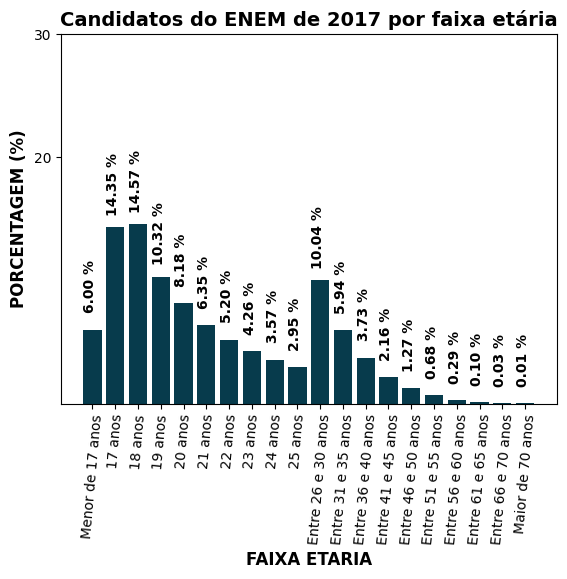

In [13]:
# Fazer gráfico completo de barras de inscritos por renda

x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar(x, heights,
    color=len(df_temp)*["#073B4C"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    "Candidatos do ENEM de 2017 por faixa etária",    # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "FAIXA ETARIA",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i+1) * 0.1 for i in range(1, int(10*max(df_temp.values)+2))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, cor_raca in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[cor_raca] + 0.035,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[cor_raca]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold',                         # fonte em negrito
        rotation=90
    )

# Mostrando o gráfico
plt.show()

<h1>Análise bivariada</h1>

In [14]:
path = '../datasets/microdados_enem_2017/DADOS/MICRODADOS_ENEM_2017.csv'
df = pd.read_csv(
    path, # caminho do arquivo a ser lido 
    encoding='iso-8859-1', # codificação dos caracteres 
    sep=';', # separador de colunas
    usecols=[
        'TP_FAIXA_ETARIA', 'Q006', 'TP_SEXO',  'TP_COR_RACA',
        'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
)
df.info() # 462.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731278 entries, 0 to 6731277
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP_FAIXA_ETARIA  int64  
 1   TP_SEXO          object 
 2   TP_COR_RACA      int64  
 3   NU_NOTA_CN       float64
 4   NU_NOTA_CH       float64
 5   NU_NOTA_LC       float64
 6   NU_NOTA_MT       float64
 7   NU_NOTA_REDACAO  float64
 8   Q006             object 
dtypes: float64(5), int64(2), object(2)
memory usage: 462.2+ MB


In [15]:
# Criar a coluna de nota final fazendo a média das notas em cada competência mais a redação
df['NOTA_FINAL'] = (df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + \
                   df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + \
                   + df['NU_NOTA_REDACAO'] ) / 5

In [16]:
# Considerar apenas linhas onde a nota não seja nula
df = df[df['NOTA_FINAL'].notna()]

## Nota média por Faixa etária

In [17]:
# remover warning
pd.options.mode.chained_assignment = None

# Filtrar com apenas faixas etárias não agrupadas
df_temp = df[(df['TP_FAIXA_ETARIA']<=10) & (df['TP_FAIXA_ETARIA']>=2)]

# Converter categoria numérica para categoria textual
df_temp['TP_FAIXA_ETARIA'] = df_temp['TP_FAIXA_ETARIA'].map(lambda x: x + 15)
df_temp['TP_FAIXA_ETARIA'].value_counts()

17    824831
18    768328
19    487343
20    354929
21    257013
22    198898
23    155499
24    126155
25    101826
Name: TP_FAIXA_ETARIA, dtype: int64

In [18]:
# Agrupar as notas por idade e agregar pela média
df_group = df_temp.groupby('TP_FAIXA_ETARIA').agg({"NOTA_FINAL": 'mean'})
df_group

,NOTA_FINAL
TP_FAIXA_ETARIA,
17,532.946252
18,525.648092
19,519.617184
20,514.508809
21,511.524815
22,509.696958
23,508.982047
24,508.157848
25,509.012554


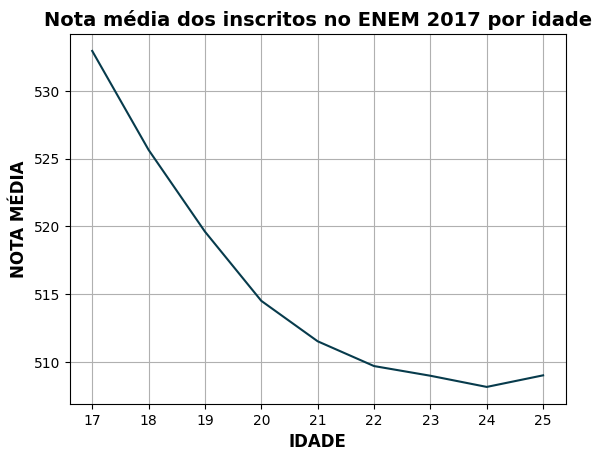

In [19]:
# Definindo x e y
x = df_group['NOTA_FINAL'].index
y = df_group['NOTA_FINAL'].values

# Criando o gráfico
plt.plot(x, y,
    color="#073b4c", # Cor
)

# Propriedades gerais

## Título
plt.title(
    "Nota média dos inscritos no ENEM 2017 por idade", # Texto
    fontsize=14,                                       # Fonte de tamanho 14
    fontweight='bold'                                  # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "IDADE",                       # Texto
    fontsize=12,                   # Fonte de tamanho 12
    fontweight='bold'              # Fonte em negrito 
)

## Rótulo do eixo vertical
plt.ylabel(
    "NOTA MÉDIA",                 # Texto
    fontsize=12,                  # Fonte de tamanho 12
    fontweight='bold'             # Fonte em negrito
)

## Grade
plt.grid('on')

## Nota por renda familiar

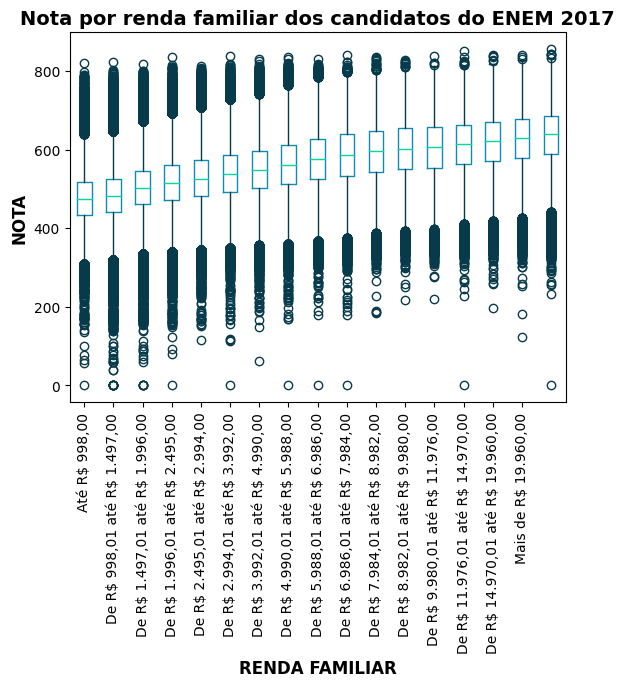

In [20]:
# Notas totais (x) dos candidatos cuja renda familiar é inferior a R$998,00
xs = []
ys = []
for letter in sorted(df['Q006'].unique()[:-1]): # elimiando o nan
    xs.append(df[df['Q006'] == letter]['NOTA_FINAL'].values)

# Criando o gráfico
plt.boxplot(xs,
    boxprops=dict(color="#118AB2"),                               # Caixa
    capprops=dict(color="#073B4C"),                               # Linha horizontal
    whiskerprops=dict(color="#073B4C"),                           # Linha vertical
    flierprops=dict(color="#118AB2", markeredgecolor="#073B4C"),  # Outliers
    medianprops=dict(color="#06D6A0"),                            # Mediana
)

# Propriedades gerais
## Título
plt.title(
    "Nota por renda familiar dos candidatos do ENEM 2017", # texto
    fontsize=14, # tamanho da font
    fontweight='bold' # colocando em negrito
)
## Rótulo do eixo horizontal
plt.xlabel(
    "RENDA FAMILIAR", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)
## Rótulo do eixo vertical
plt.ylabel(
    "NOTA", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)

## Marcações do eixo horizontal
plt.xticks(list(range(1,17)), [
    'Até R\$ 998,00',
    'De R\$ 998,01 até R\$ 1.497,00',
    'De R\$ 1.497,01 até R\$ 1.996,00',
    'De R\$ 1.996,01 até R\$ 2.495,00',
    'De R\$ 2.495,01 até R\$ 2.994,00',
    'De R\$ 2.994,01 até R\$ 3.992,00',
    'De R\$ 3.992,01 até R\$ 4.990,00',
    'De R\$ 4.990,01 até R\$ 5.988,00',
    'De R\$ 5.988,01 até R$ 6.986,00',
    'De R\$ 6.986,01 até R\$ 7.984,00',
    'De R\$ 7.984,01 até R\$ 8.982,00',
    'De R\$ 8.982,01 até R\$ 9.980,00',
    'De R\$ 9.980,01 até R\$ 11.976,00',
    'De R\$ 11.976,01 até R\$ 14.970,00',
    'De R\$ 14.970,01 até R\$ 19.960,00',
    'Mais de R\$ 19.960,00'
], rotation=90, fontsize=10)

plt.show()

## Nota por sexo

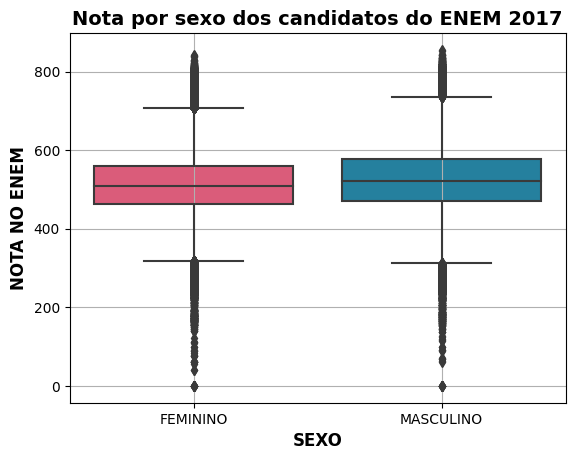

In [21]:
sns.boxplot(
    data=df, 
    x="TP_SEXO",
    y="NOTA_FINAL", 
    palette=['#EF476F', '#118AB2'])

# Propriedades gerais
## Título
plt.title(
    "Nota por sexo dos candidatos do ENEM 2017", # texto
    fontsize=14, # tamanho da font
    fontweight='bold' # colocando em negrito
)
## Rótulo do eixo horizontal
plt.xlabel(
    "SEXO", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)
plt.xticks([0,1], ['FEMININO', 'MASCULINO'])
## Rótulo do eixo vertical
plt.ylabel(
    "NOTA NO ENEM", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)

plt.grid('on')

plt.show()

In [22]:
df['TP_COR_RACA'] = df['TP_COR_RACA'].map({
    0: "Não declarado",
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena",
})

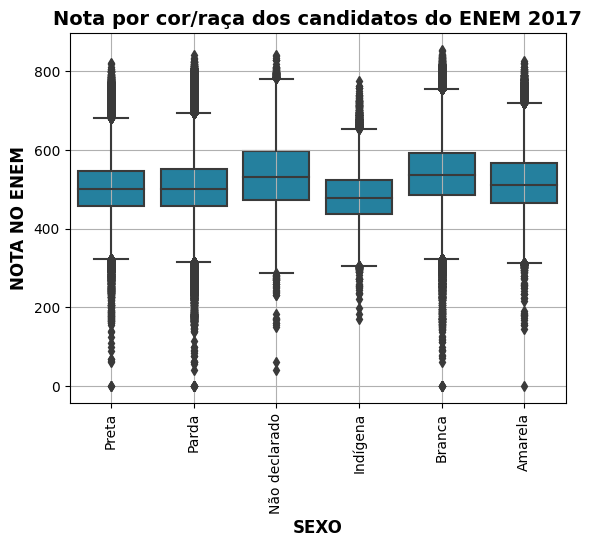

In [23]:
my_order = df.groupby(by=["TP_COR_RACA"])["NOTA_FINAL"].median().iloc[::-1].index

sns.boxplot(
    data=df,
    color="#118AB2",
    x="TP_COR_RACA",
    order=my_order,
    y="NOTA_FINAL")

# Propriedades gerais
## Título
plt.title(
    "Nota por cor/raça dos candidatos do ENEM 2017", # texto
    fontsize=14, # tamanho da font
    fontweight='bold' # colocando em negrito
)
## Rótulo do eixo horizontal
plt.xlabel(
    "SEXO", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)
plt.xticks(rotation=90)
## Rótulo do eixo vertical
plt.ylabel(
    "NOTA NO ENEM", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)

plt.grid('on')

plt.show()

In [25]:
from IPython.display import Image, HTML, display

img_A = '../assets/dashboardp1.png'
img_B = '../assets/dashboardp2.png'

display(HTML("<table><tr><td><img src={0}></td><td><img src={1}></td></tr></table>".format(img_A,img_B)))

,
